# Reservas de Hoteles y cancelacion de reservas

**Contexto empresarial**

Somos a una empresa dedicada a la administración de hoteles y resorts vinculado a la industria del turismo. Incluyendo desde alojamientos, traslados, actividades, seguro de viaje y comercios por mencionar algunos. Para mantener nuestros estándares de calidad conformamos un equipo que analiza periódicamente nuevas bases de datos, con el fin de estudiar el comportamiento de los clientes y así poder ser más eficientes a la hora de generar promociones, publicidades y hasta incluso ver si nuestras políticas de reservaciones y cancelaciones se adecuan a la mejor opción posible.

**Problema empresarial**

Se recopilo un conjuntos de datos con el objetivo de desarrollar modelos de predicción para clasificar la probabilidad de cancelación de una reserva de hotel.

**Contexto analitico:**

En el presente notebook accedemos a un CSV de una de nuestra bases de datos donde empleamos un análisis descriptivo con el fin de entender mejor los datos asociados a una reserva (cantidad de personas, fecha, tipo de habitación, etc) y su relación con las cancelaciones asociadas a esa misma reserva.




* Carga de librerias

In [1]:
#Importamos la librerias del Proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#    sklearn
from sklearn.impute import SimpleImputer

* Carga del Conjunto de Datos

In [2]:
#Carga del Datasets
datos = pd.read_csv('hotel_bookings.csv')

#Vista previa del Datasets
df = datos.copy()
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Análisis Exploratorio de datos

Conoceremos las principales caracteristicas de nuestros datos (Variables, Tipo de dato, cantidad de filas y columnas) con la finalidad de comenzar a comprender el Datasets.

In [3]:
#Comprobamos los tipos de datos de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Valores Nulos

In [4]:
# Visualizamos la cantidad de valores Null y verificamos contra los graficos de msno
df.isnull().sum()[df.isnull().sum()>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

Acontinuacion demostraremos como estan distribuidos los valores nulos y la correlacion entre estos

<AxesSubplot: >

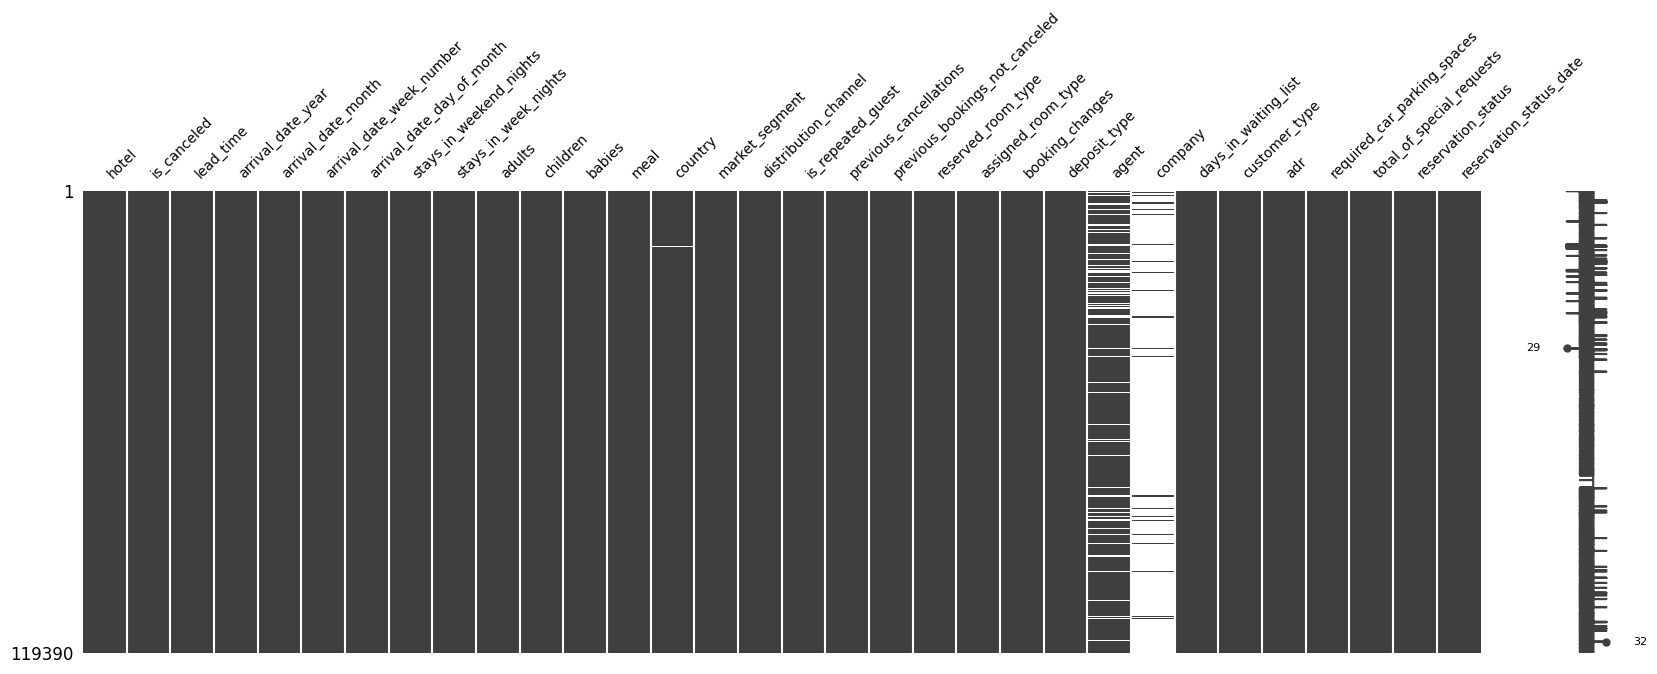

In [5]:
# Representacion de los nulos dentro de una matriz
msno.matrix(df, figsize=[20, 6], fontsize=10)

Podemos visualizar facilmente que la representacion de los nulos en la matriz siendo company y agent las principales variables afectadas

<AxesSubplot: >

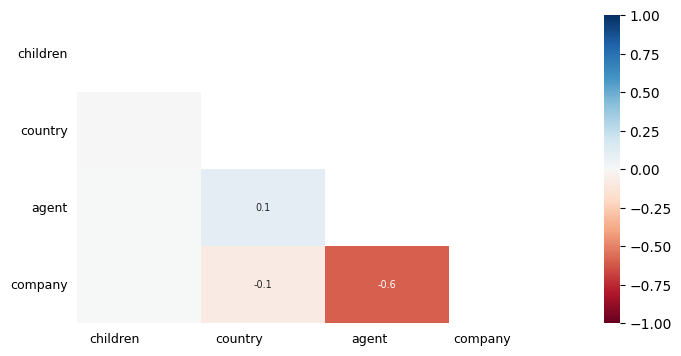

In [6]:
#Intentamos ota forma de visualizacion con libreria msno

msno.heatmap(df, figsize=[8, 4], fontsize=9, label_rotation=0, )

El heatmap, en este caso, no nutre el analisis.

* Trabajaremos los datos nulos

1. Columna ***company*** Si no se proporciona una compañia se asumira que se hizo directo con el hotel su valor sera Cero (0)
2. Columna ***agent*** Si no se proporciona un agente su valor sera Cero (0)
3. Columna ***children*** Si no se proporciona una cantidad se asumira como 0 (cero)
4. Variable ***country*** Si no se proporciona una Pais se tomara como deconocido

In [7]:
imputer_cero = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=0)
imputer_cero = imputer_cero.fit(df[['children','company', 'agent']])
df[['children','company', 'agent']] = imputer_cero.transform(df[['children','company', 'agent']])

imputer_country = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value='Desconocido')
imputer_country = imputer_country.fit(df[['country']])
df[['country']] = imputer_country.transform(df[['country']])

In [8]:
#Verificamos los cambios
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Datos duplicados.

In [9]:
# Visualizamos datos duplicados

print(f'Cantidad de datos Duplicados: {df.duplicated().sum()}')
print(f'Cantidad de datos No Duplicados: {(~df.duplicated()).sum()}')
print(f'Datos Totales: {df.shape[0]}')

Cantidad de datos Duplicados: 31994
Cantidad de datos No Duplicados: 87396
Datos Totales: 119390


In [10]:
## Si quisieramos eliminar los duplicados
## df.loc[df.duplicated(keep='first'), : ]

### Conclusion datos duplicados.

Si bien podriamos eliminar una parte o todos los datos duplicados con "**df.drop_duplicates(keep='first')**", para el modelo de Clasificacion mantendremos los datos duplicados

## Análisis Exploratorio de datos

Para conocer las principales características del conjunto de datos realizamos los siguientes análisis preliminares con sus respectivas verificaciones y representaciones gráficas

1. [¿Cuál es la tasa de cancelaciones?](#pregunta-1)
2. [¿Cuanto se paga por noche segun la habitacion?](#pregunta-2)
3. [Evolucion de las reservaciones a lo largo del año](#pregunta-3)
4. [¿Por que via entran las reservaciones?](#pregunta-4)
5. [¿Como varia el precio de la habitacion a lo largo del año?](#pregunta-5)
6. [¿Que mes tiene la mayor cantidad de reservaciones canceladas?](#pregunta-6)


### Pregunta 1 
#### ¿Cuál es la tasa de cancelaciones?

[Volver Arriba](#reservas-de-hoteles-y-cancelacion-de-reservas)

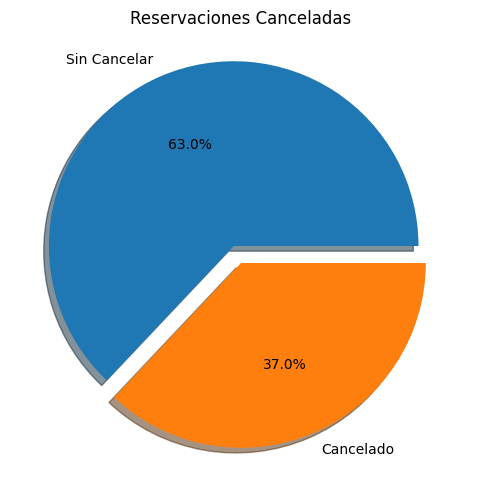

In [11]:
df_cancel = df['is_canceled'].value_counts(normalize=True)
df_cancel

#Visualizamos los valores de nuestra columa IS_CANCELED 
df_cancel_label = ['Sin Cancelar', 'Cancelado']

explode = (0.1, 0) #Nos permitira separar los datos en el Grafico de torta

#Visualizamos el % de reservas Canceladas y no canceladas
fig,ax = plt.subplots(figsize=(7, 6), facecolor='white')
df_pie = ax.pie(df_cancel, labels=df_cancel_label, autopct='%1.1f%%', explode=explode, shadow=True)
ax.set_title('Reservaciones Canceladas')

plt.show()

#### Observacion 1

Podemos observar que es mayor la cantidad de reservacionses que no fueron canceladas

### Pregunta 2
#### ¿Cuanto se paga por noche segun la habitacion?

[Volver Arriba](#reservas-de-hoteles-y-cancelacion-de-reservas)


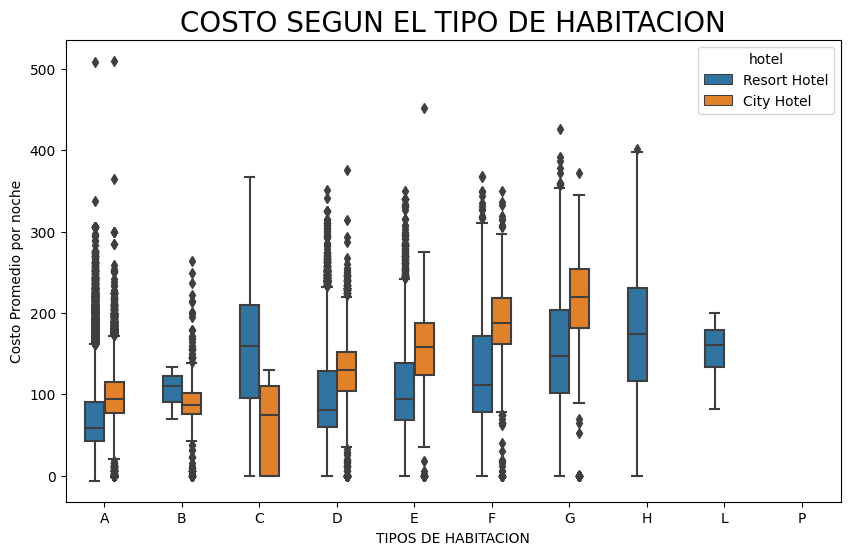

In [12]:
df_no_canceled = df[df['is_canceled'] == 0]

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=df_no_canceled, order=np.sort(df['reserved_room_type'].unique()), width=0.5)
plt.title('COSTO SEGUN EL TIPO DE HABITACION', fontsize=20, )
plt.xlabel('TIPOS DE HABITACION')
plt.ylabel('Costo Promedio por noche')

plt.show();

#### observacion 2


### Pregunta 3
#### Cuantas reservaciones no fueron canceladas por mes?

[Volver Arriba](#reservas-de-hoteles-y-cancelacion-de-reservas)

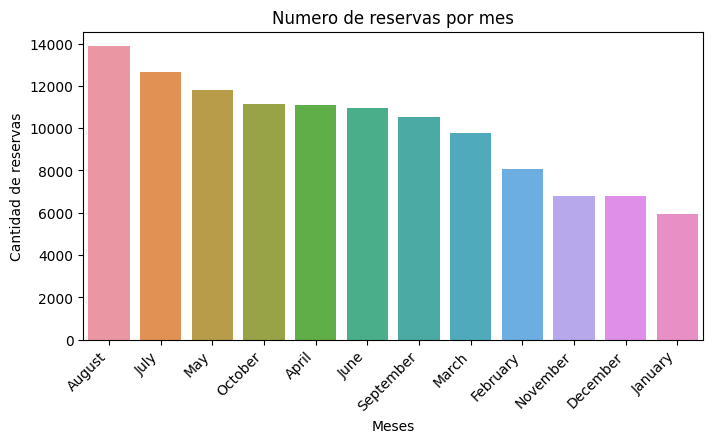

In [15]:
#Graficamos la cantidad de reservaciones para cada mes
ordenado_por = df['arrival_date_month'].value_counts().index

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x='arrival_date_month' , data=df, order=ordenado_por, )

plt.title('Numero de reservas por mes')
plt.xlabel('Meses', )
plt.ylabel('Cantidad de reservas')
plt.xticks(rotation=45,ha='right')

plt.show()

#### Observacion

Podemos observar que los meses de ***Agosto, Julio, Mayo, Octubre, abril y Junio*** son los meses con mayor cantidad de reservaciones

### Pregunta 4
#### ¿Por que via entran las reservaciones?

[Volver Arriba](#reservas-de-hoteles-y-cancelacion-de-reservas)

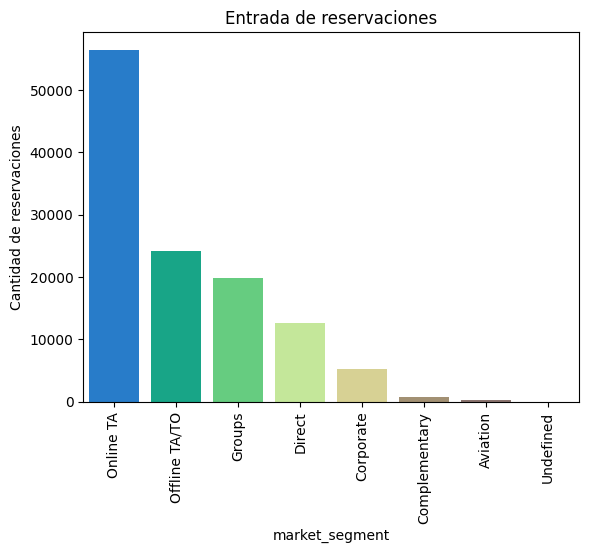

In [16]:
sns.countplot(x="market_segment", data = df ,palette = 'terrain', order = df['market_segment'].value_counts().index)
plt.title('Entrada de reservaciones')
plt.xticks(rotation = 90)
plt.ylabel('Cantidad de reservaciones')
plt.show()

#### Observacion 4

Podemos Observar que la gran mayoria de las reservaciones son realizadas por **TA = Agentes de viajes**  

### Pregunta 5

¿Como varia el precio de la habitacion a lo largo del año?

[Volver Arriba](#reservas-de-hoteles-y-cancelacion-de-reservas)

C:\Users\Castro juan\AppData\Local\Temp\ipykernel_4512\182975005.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
C:\Users\Castro juan\AppData\Local\Temp\ipykernel_4512\182975005.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_guests["arrival_date_month"] = pd.Categorical(actual_guests["arrival_date_month"], categories=meses , ordered=True)


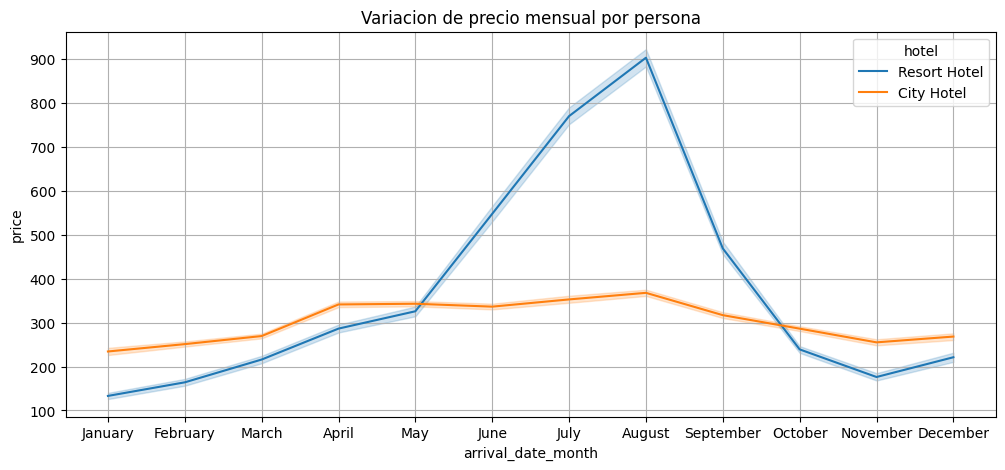

In [17]:
meses = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

#Tomaremos las reservas no canceladas
actual_guests = df[df["is_canceled"] == 0]

#Calculamos el precio por noches de hospedaje
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
actual_guests["arrival_date_month"] = pd.Categorical(actual_guests["arrival_date_month"], categories=meses , ordered=True)

plt.figure(figsize=(12,5))
sns.lineplot( x = 'arrival_date_month', y = 'price', hue = 'hotel', data = actual_guests)
plt.grid()
plt.title('Variacion de precio mensual por persona')
plt.show()

#### Observaciones
Podemos ver que en ***City Hotel*** El precio casi no varia a lo largo del año mientras que en ***Resort Hotel*** el Precio varia en lo meses que tienen mas cantidad de reservacions tal como pudimos observar en las graficas pasadas

### Pregunta 6
#### ¿Que mes tiene la mayor cantidad de reservaciones canceladas?

[Volver Arriba](#reservas-de-hoteles-y-cancelacion-de-reservas)

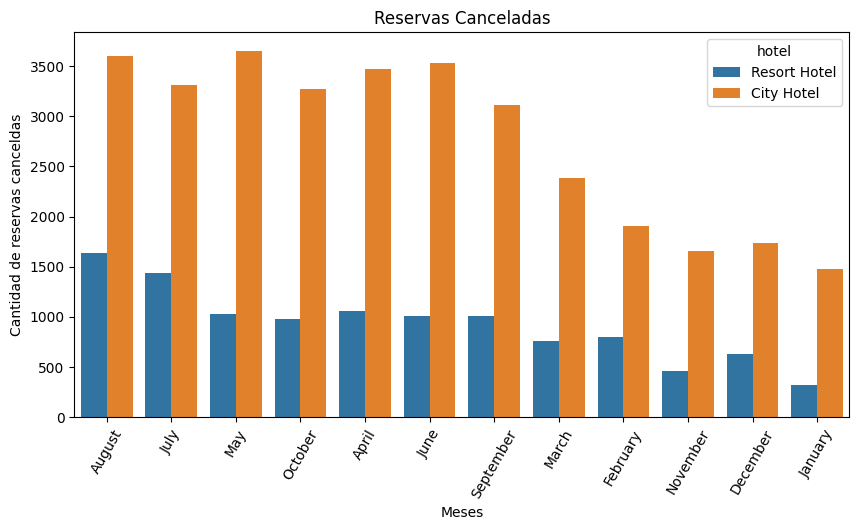

In [18]:
# Visualizamos la Cantidad de reservas segun el tipo de Hotel

cancel = df[df['is_canceled']==1]
orden = df['arrival_date_month'].value_counts().index

plt.figure(figsize=(10,5))
sns.countplot(x='arrival_date_month', data=cancel, order=orden, hue='hotel')

plt.title('Reservas Canceladas')
plt.xlabel('Meses')
plt.ylabel('Cantidad de reservas canceldas')
plt.xticks(rotation=60)

plt.show()

#### Observacion 6

Los meses de ***Agosto y Julio*** tienen la mayor cantidad de cancelaciones pero se considera que es una cantidad acorde con la cantidad de reservaciones

### Pregunta 7
#### Cuales son las reservaciones con mayor cantidad de dias?

Debido que el dataset tiene las noches de reserva separado por dias de semana y dias de fin de semana. Crearemos una variable que contabilice el total de noches de reservas para las reservas no canceladas

In [19]:
df_no_canceled['total_noches'] = df_no_canceled['stays_in_weekend_nights'] + df_no_canceled['stays_in_week_nights']

C:\Users\Castro juan\AppData\Local\Temp\ipykernel_4512\3760603656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_canceled['total_noches'] = df_no_canceled['stays_in_weekend_nights'] + df_no_canceled['stays_in_week_nights']


In [20]:
estadia = df_no_canceled.groupby(['total_noches', 'hotel']).agg('count').reset_index()
estadia = estadia.rename(columns={'is_canceled' : 'Numero Noches'})
estadia = estadia.iloc[:, :3]
estadia

,total_noches,hotel,Numero Noches
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


(0.0, 17.0)

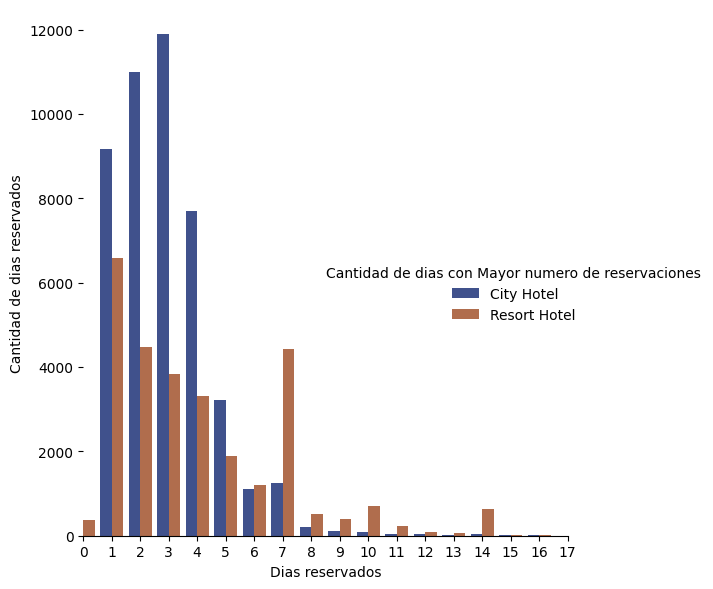

In [21]:
noches = sns.catplot(data=estadia, kind="bar", x="total_noches", y="Numero Noches", hue="hotel", palette="dark", alpha=.8, height=6)
noches.despine(left=True)
noches.set_axis_labels("Dias reservados", "Cantidad de dias reservados")
noches.legend.set_title("Cantidad de dias con Mayor numero de reservaciones")
plt.xlim(0, 17)

Podemos observar que a igual cantidad de dias reservados, siempre es el Resort Hotel el que mas cantidad de reservas tiene

## Insight:

* El "City Hotel" es el hotel con mas reservaciones, en esto puede estar influiyendo la hubicacion dentor de la ciudad y la diferencia de costo de la habiatacion

* El "City Hotel" es quien presenta mayor cantidad de reservaciones canceladas

* Los meses de mayor cantidad de reservas son "Agosto, Junio, Julio" debido a que es la temporada de verano que incluye las vacaciones de verano

* En los meses de mayor reservacion debido al Clima el "Resort Hotel" Aumenta sus precio considerablemente, esto puede deberse a que ofrezca algunos servicios adicionales como "Pileta" y otros entretenimientos

* El "City Hotel" puede ser un hotel de paso debido a que la cantidad de noches con mayor reservacion es de 2 a 3 noches, mientras que en el "Resort Hotel" va de 2 a 7 noches
